# 久期：Python 实操 2

本讲涵盖以下模块：

1. 银行资产负债久期缺口分析；
2. 含权债券的有效久期；
3. 使用 AkShare 获取中国国债收益率并计算久期。

所有代码均可直接在 VS Code 的 Jupyter Notebook 中运行。

## 利率风险管理与久期缺口分析

本节演示银行如何利用久期缺口 (DG) 衡量净值对利率变化的敏感度，并通过可视化展示不同 DG 水平下净值的变动。

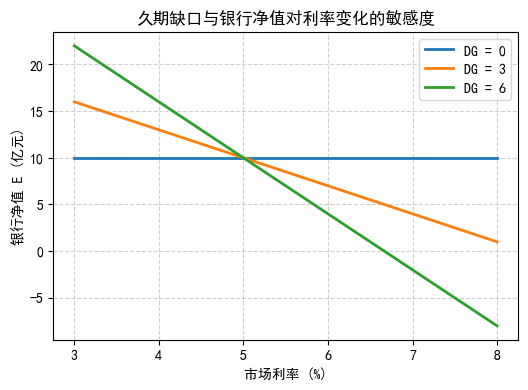

当利率上升 1% 时:
  DG=0 → 净值变化约 0.0%
  DG=3 → 净值变化约 -30.0%
  DG=6 → 净值变化约 -60.0%


In [5]:
import numpy as np
import matplotlib.pyplot as plt
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

A, L = 100, 90
E0 = A - L
DG_list = [0, 3, 6]
r = np.linspace(0.03, 0.08, 101)
results = {}
for DG in DG_list:
    dE = -DG * (r - 0.05) * (A/E0)
    E = E0 * (1 + dE)
    results[DG] = E
plt.figure(figsize=(6,4))
for DG, E in results.items():
    plt.plot(r*100, E, lw=2, label=f'DG = {DG}')
plt.title('久期缺口与银行净值对利率变化的敏感度')
plt.xlabel('市场利率 (%)')
plt.ylabel('银行净值 E (亿元)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
print('当利率上升 1% 时:')
for DG in DG_list:
    dE = -DG * 0.01 * (A/E0)
    print(f'  DG={DG} → 净值变化约 {dE*100:.1f}%')

## 含权债券的有效久期计算

有效久期 $D_{Eff}$ 衡量含权债券价格对利率变化的平均敏感度。由于发行人可能在利率下降时提前赎回，含权债券的价格变化往往不对称。

有效久期 D_eff = 5.00 年
含权债券的有效久期低于普通债券, 因为价格对利率变化的反应不对称。


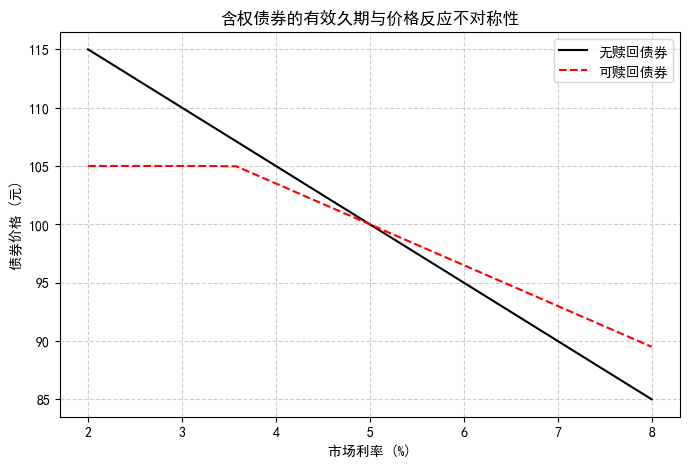

In [3]:
P0, Δy = 100, 0.01
P_minus, P_plus = 105, 95
D_eff = (P_minus - P_plus) / (2 * P0 * Δy)
print(f'有效久期 D_eff = {D_eff:.2f} 年')
print('含权债券的有效久期低于普通债券, 因为价格对利率变化的反应不对称。')
y = np.linspace(0.02, 0.08, 20)
P_no_option = 100 * (1 - 5 * (y - 0.05))
P_callable = 100 * (1 - 3.5 * (y - 0.05))
P_callable[P_callable>105] = 105
plt.figure(figsize=(8,5))
plt.plot(y*100, P_no_option, label='无赎回债券', color='black')
plt.plot(y*100, P_callable, label='可赎回债券', color='red', linestyle='--')
plt.xlabel('市场利率 (%)')
plt.ylabel('债券价格 (元)')
plt.title('含权债券的有效久期与价格反应不对称性')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## 使用 AkShare 获取中国国债收益率并计算久期

本节演示如何使用 AkShare 获取中国国债收益率数据，并计算不同期限债券的久期示意。

  0%|          | 0/19 [00:00<?, ?it/s]

数据示例:
           日期  中国国债收益率2年  中国国债收益率5年  中国国债收益率10年  中国国债收益率30年  中国国债收益率10年-2年  \
0  1990-12-19        NaN        NaN         NaN         NaN            NaN   
1  1990-12-20        NaN        NaN         NaN         NaN            NaN   
2  1990-12-21        NaN        NaN         NaN         NaN            NaN   
3  1990-12-24        NaN        NaN         NaN         NaN            NaN   
4  1990-12-26        NaN        NaN         NaN         NaN            NaN   

   中国GDP年增率  美国国债收益率2年  美国国债收益率5年  美国国债收益率10年  美国国债收益率30年  美国国债收益率10年-2年  \
0       NaN       7.21       7.64        8.00        8.19           0.79   
1       NaN       7.25       7.67        8.05        8.22           0.80   
2       NaN       7.30       7.75        8.11        8.28           0.81   
3       NaN       7.35       7.84        8.20        8.36           0.85   
4       NaN       7.27       7.78        8.15        8.30           0.88   

   美国GDP年增率  
0       NaN  
1       NaN  
2       NaN  
3       NaN 

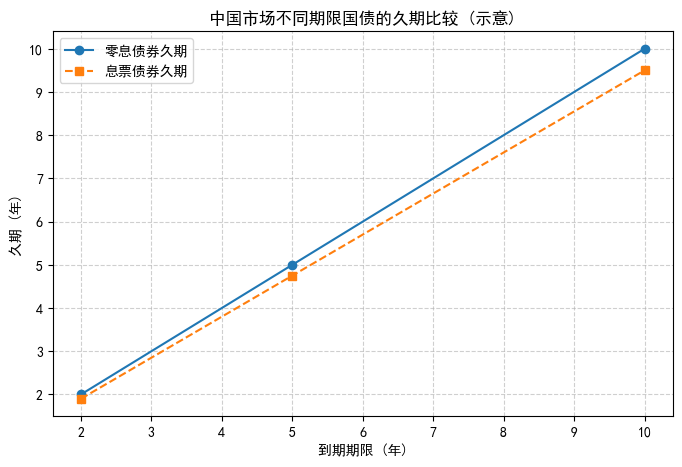

结果说明: 零息债券久期等于到期时间, 而息票债券久期较短, 因为提前收到现金流。


In [4]:
import akshare as ak
try:
    yield_curve = ak.bond_zh_us_rate()
    print('数据示例:')
    print(yield_curve.head())
except Exception as e:
    print('未能成功访问 AkShare 接口, 请检查网络或数据源:', e)
maturity = np.array([2, 5, 10])
yield_rate = np.array([0.025, 0.03, 0.035])
D_zcb = maturity
D_coupon = maturity - 0.5 * (maturity/10)
plt.figure(figsize=(8,5))
plt.plot(maturity, D_zcb, 'o-', label='零息债券久期')
plt.plot(maturity, D_coupon, 's--', label='息票债券久期')
plt.title('中国市场不同期限国债的久期比较 (示意)')
plt.xlabel('到期期限 (年)')
plt.ylabel('久期 (年)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
print('结果说明: 零息债券久期等于到期时间, 而息票债券久期较短, 因为提前收到现金流。')